##### Who is the favorite ?

#1 : Highest win percentage in the regular season

#2 : Closest to best offense and best defense

#3 : Best championship odds at the beginning of the season

#4 : Best championship odds at the end of the season

In [1]:
import pandas as pd
from nba_api.stats.endpoints import leaguedashteamstats
from nba_api.stats.static import teams

In [4]:
Favorites_df = pd.DataFrame({
    'Year':range(1997,2025),    
})

In [5]:
champs = []
for year in range(1997,2024):
    champs.append(teams._find_teams_by_championship_year(year))
    
#Weirdly, the teams data didn't get updated in 2024, but that's not a big problem    
champs.append('Boston Celtics')

Favorites_df['Champion']=champs

In [6]:
Favorites_df

,Year,Champion
0,1997,Chicago Bulls
1,1998,Chicago Bulls
2,1999,San Antonio Spurs
3,2000,Los Angeles Lakers
4,2001,Los Angeles Lakers
5,2002,Los Angeles Lakers
6,2003,San Antonio Spurs
7,2004,Detroit Pistons
8,2005,San Antonio Spurs
9,2006,Miami Heat


## #1 : N°1 seed

In [29]:
Fav_Wins = 0
Favorites = 0
N1Seeds = []

for year in range(1997,2025):
    
    team_advanced_stats = leaguedashteamstats.LeagueDashTeamStats(
    season=f"{year-1}-{str(year)[-2:]}",
    season_type_all_star='Regular Season',
    ).get_data_frames()[0]
    
    Best_W_PCT = team_advanced_stats.sort_values(by=['W_PCT'], ascending=False).iloc[0]['W_PCT']
    
    champ = Favorites_df[Favorites_df['Year']==year]['Champion'].values[0]

    n1_seed = list(team_advanced_stats[team_advanced_stats['W_PCT']==Best_W_PCT]['TEAM_NAME'])
    
    Favorites += len(n1_seed)

    #Surely there's a better way to do that
    if len(n1_seed)==1:
        N1Seeds.append(n1_seed[0])
    else:
        N1Seeds.append(n1_seed)
    
    for team in n1_seed:
        if team == champ:
            Fav_Wins+=1


['Chicago Bulls', ['Chicago Bulls', 'Utah Jazz'], ['San Antonio Spurs', 'Utah Jazz'], 'Los Angeles Lakers', 'San Antonio Spurs', 'Sacramento Kings', ['Dallas Mavericks', 'San Antonio Spurs'], 'Indiana Pacers', 'Phoenix Suns', 'Detroit Pistons', 'Dallas Mavericks', 'Boston Celtics', 'Cleveland Cavaliers', 'Cleveland Cavaliers', 'Chicago Bulls', ['Chicago Bulls', 'San Antonio Spurs'], 'Miami Heat', 'San Antonio Spurs', 'Golden State Warriors', 'Golden State Warriors', 'Golden State Warriors', 'Houston Rockets', 'Milwaukee Bucks', 'Milwaukee Bucks', 'Utah Jazz', 'Phoenix Suns', 'Milwaukee Bucks', 'Boston Celtics']


In [30]:
print(Favorites,Fav_Wins)

32 11 ['Chicago Bulls', ['Chicago Bulls', 'Utah Jazz'], ['San Antonio Spurs', 'Utah Jazz'], 'Los Angeles Lakers', 'San Antonio Spurs', 'Sacramento Kings', ['Dallas Mavericks', 'San Antonio Spurs'], 'Indiana Pacers', 'Phoenix Suns', 'Detroit Pistons', 'Dallas Mavericks', 'Boston Celtics', 'Cleveland Cavaliers', 'Cleveland Cavaliers', 'Chicago Bulls', ['Chicago Bulls', 'San Antonio Spurs'], 'Miami Heat', 'San Antonio Spurs', 'Golden State Warriors', 'Golden State Warriors', 'Golden State Warriors', 'Houston Rockets', 'Milwaukee Bucks', 'Milwaukee Bucks', 'Utah Jazz', 'Phoenix Suns', 'Milwaukee Bucks', 'Boston Celtics']


32 teams got the n°1 seed in the league in those 27 years. Only 11 of those won the trophy in the end.

In [31]:
Favorites_df['N°1 Seeds']=N1Seeds

In [32]:
Favorites_df

,Year,Champion,N°1 Seeds
0,1997,Chicago Bulls,Chicago Bulls
1,1998,Chicago Bulls,"[Chicago Bulls, Utah Jazz]"
2,1999,San Antonio Spurs,"[San Antonio Spurs, Utah Jazz]"
3,2000,Los Angeles Lakers,Los Angeles Lakers
4,2001,Los Angeles Lakers,San Antonio Spurs
5,2002,Los Angeles Lakers,Sacramento Kings
6,2003,San Antonio Spurs,"[Dallas Mavericks, San Antonio Spurs]"
7,2004,Detroit Pistons,Indiana Pacers
8,2005,San Antonio Spurs,Phoenix Suns
9,2006,Miami Heat,Detroit Pistons


## #2 : Best team in ratings

In [34]:
Contenders = pd.read_csv("../Champion Golden zone/1996-2025 team ratings.csv")
Contenders=Contenders.drop(['Index'],axis=1)

In [35]:
def distance(x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**.5

In [36]:
def min_distance_to_best(X,Y):
    min_distance = 100
    index=-1
    for i in range(len(X)):
        x,y = X[i],Y[i]
        
        distance_to_best = distance(x,y,1,1)
        
        if distance_to_best < min_distance:
            min_distance = distance_to_best
            index=i
    return min_distance,index

In [37]:
Fav_Wins = 0
Favorites = 0
Best_Ranked_Teams = []

for year in range(1997,2025):
    
    contender_year = Contenders[Contenders['Year']==year]
    X = list(contender_year['Normalized_Off_Rating'])
    Y = list(contender_year['Normalized_Def_Rating'])
    
    min_distance,index = min_distance_to_best(X,Y)
    
    favorite = contender_year.iloc[index]['Team']
    
    Best_Ranked_Teams.append(favorite)
    
    Favorites+=1
    
    champ = Favorites_df[Favorites_df['Year']==year]['Champion'].values[0]
        
    if favorite == champ:
        Fav_Wins+=1
        
print(Favorites,Fav_Wins)    

28 11


In those 28 years, the team that was the closest to both the best defense and offense won the title 11 times. Just a little more accurate than the 1st seeds, but not that much. Quite the surprise, the best regular season team is usually not the one winning it all.

In [38]:
Favorites_df['Best Ranked Team']=Best_Ranked_Teams
Favorites_df

,Year,Champion,N°1 Seeds,Best Ranked Team
0,1997,Chicago Bulls,Chicago Bulls,Chicago Bulls
1,1998,Chicago Bulls,"[Chicago Bulls, Utah Jazz]",Chicago Bulls
2,1999,San Antonio Spurs,"[San Antonio Spurs, Utah Jazz]",San Antonio Spurs
3,2000,Los Angeles Lakers,Los Angeles Lakers,Los Angeles Lakers
4,2001,Los Angeles Lakers,San Antonio Spurs,San Antonio Spurs
5,2002,Los Angeles Lakers,Sacramento Kings,Sacramento Kings
6,2003,San Antonio Spurs,"[Dallas Mavericks, San Antonio Spurs]",Sacramento Kings
7,2004,Detroit Pistons,Indiana Pacers,Minnesota Timberwolves
8,2005,San Antonio Spurs,Phoenix Suns,San Antonio Spurs
9,2006,Miami Heat,Detroit Pistons,Detroit Pistons


## #3 & #4: Vegas favorite at the beginning of the season and at the beginning of the Play-Offs

In [39]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [40]:
def find_odds_year(year):

    season=f"{str(year-1)}-{year}"
    
    driver = webdriver.Chrome()
    driver.get(f"https://www.sportsoddshistory.com/nba-main/?y={season}&sa=nba&a=finals&o=r")
    
    WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.TAG_NAME, "td")))

    div = driver.find_element(By.CLASS_NAME, "soh1")
    
    
    table = div.find_elements(By.TAG_NAME, "tbody")[0]   
    rows = table.find_elements(By.TAG_NAME, "tr")
    
    team_names=[]
    
    for row in rows:
        cells = row.find_elements(By.TAG_NAME, "td")
        team_name = cells[0].get_attribute("innerText").strip()
        team_names.append(team_name)

    
    columns = div.find_elements(By.TAG_NAME, "thead")[0].find_elements(By.TAG_NAME, "tr")[0].find_elements(By.TAG_NAME, "th")
    
    #Get the championship odds for both the beginning of the season and the beginning of the playoffs (not the same size for all table all years)
    #Get the last odd from 'Preseason odds' and the 1st one from 'Playoff Odds', but some years have 'During the season odds' and some don't
    if len(columns)<5:
         nb_col=[int(columns[1].get_attribute("colspan")),0]
    else:
        nb_col=[int(columns[1].get_attribute("colspan")),int(columns[2].get_attribute("colspan"))]
        
    nb_col[1]=nb_col[1]+nb_col[0]+1

    
    DF_Columns = ["Team", "Year", "Odds Before Season","Odds Before PO", "Champion"]
    
    Odds_df = pd.DataFrame(columns=DF_Columns)
    
    
    for row in rows:
        cells = row.find_elements(By.TAG_NAME, "td")
        l=[]
        for cell in cells:
            text = cell.get_attribute("innerText").strip()
            l.append(text)
        Odds_df.loc[len(Odds_df)] =  [l[0],year,l[nb_col[0]],l[nb_col[1]],l[-1]]

    driver.close()
    return Odds_df
#find_odds_year(2004)

In [41]:
Total_Odds = find_odds_year(1997)

for year in range(1998,2025):
    Total_Odds = pd.concat([Total_Odds,find_odds_year(year)],ignore_index=True)
    #print(year,"Done")
Total_Odds

                      Team  Year Odds Before Season Odds Before PO  \
0            Chicago Bulls  1997               +100           -200   
1                Utah Jazz  1997              +1800           +700   
2          Houston Rockets  1997               +800          +1200   
3               Miami Heat  1997              +1500          +1000   
4       Los Angeles Lakers  1997               +500          +1200   
5      Seattle SuperSonics  1997               +600          +1200   
6          New York Knicks  1997               +800          +1500   
7            Atlanta Hawks  1997              +2000          +1800   
8          Detroit Pistons  1997              +5000          +2200   
9            Orlando Magic  1997              +1500          +3000   
10            Phoenix Suns  1997              +3500          +3500   
11       Charlotte Hornets  1997              +5000          +3500   
12  Portland Trail Blazers  1997              +3000          +4000   
13  Minnesota Timber

                      Team  Year Odds Before Season Odds Before PO  \
0            Chicago Bulls  1997               +100           -200   
1                Utah Jazz  1997              +1800           +700   
2          Houston Rockets  1997               +800          +1200   
3               Miami Heat  1997              +1500          +1000   
4       Los Angeles Lakers  1997               +500          +1200   
..                     ...   ...                ...            ...   
169      Memphis Grizzlies  2002              +8000                  
170          Atlanta Hawks  2002             +10000                  
171    Cleveland Cavaliers  2002             +12000                  
172          Chicago Bulls  2002             +15000                  
173  Golden State Warriors  2002             +25000                  

         Champion  
0    ** WINNER **  
1                  
2                  
3                  
4                  
..            ...  
169                

                       Team  Year Odds Before Season Odds Before PO  \
0             Chicago Bulls  1997               +100           -200   
1                 Utah Jazz  1997              +1800           +700   
2           Houston Rockets  1997               +800          +1200   
3                Miami Heat  1997              +1500          +1000   
4        Los Angeles Lakers  1997               +500          +1200   
..                      ...   ...                ...            ...   
407        Sacramento Kings  2010             +25000                  
408         New York Knicks  2010              +6600                  
409   Golden State Warriors  2010             +12500                  
410  Minnesota Timberwolves  2010             +20000                  
411         New Jersey Nets  2010             +12500                  

         Champion  
0    ** WINNER **  
1                  
2                  
3                  
4                  
..            ...  
407    

                   Team  Year Odds Before Season Odds Before PO      Champion
0         Chicago Bulls  1997               +100           -200  ** WINNER **
1             Utah Jazz  1997              +1800           +700              
2       Houston Rockets  1997               +800          +1200              
3            Miami Heat  1997              +1500          +1000              
4    Los Angeles Lakers  1997               +500          +1200              
..                  ...   ...                ...            ...           ...
647    Dallas Mavericks  2018             +50000                             
648       Atlanta Hawks  2018            +200000                             
649       Brooklyn Nets  2018            +250000                             
650    Sacramento Kings  2018            +125000                             
651        Phoenix Suns  2018            +125000                             

[652 rows x 5 columns]
                    Team  Year Odds Befo

,Team,Year,Odds Before Season,Odds Before PO,Champion
0,Chicago Bulls,1997,+100,-200,** WINNER **
1,Utah Jazz,1997,+1800,+700,
2,Houston Rockets,1997,+800,+1200,
3,Miami Heat,1997,+1500,+1000,
4,Los Angeles Lakers,1997,+500,+1200,
...,...,...,...,...,...
827,San Antonio Spurs,2024,+25000,,
828,Portland Trail Blazers,2024,+25000,,
829,Washington Wizards,2024,+50000,,
830,Charlotte Hornets,2024,+50000,,


In [42]:
Total_Odds.to_csv("Total Odds.csv",index=False)

In [43]:
def min_odd(series):
    min_odd = 10**5
    for odd in series:
        
        if odd == "":
              continue
        odd=int(odd)                    
        if odd<min_odd:
            
            min_odd = odd
    if min_odd < 0:
        return str(min_odd)
    else:
        return "+"+str(min_odd)
    

In [44]:
Favorites = [0,0]
Fav_Wins = [0,0]

Favorites_BFS = []
Favorites_BFPO = []

for year in range(1997,2025):
    odds_year = Total_Odds[Total_Odds['Year']==year]

    min_odds_bfs = min_odd(odds_year['Odds Before Season'])
    min_odds_bfpo = min_odd(odds_year['Odds Before PO'])
    
    
    favorites_bfs = list(odds_year[odds_year['Odds Before Season']==min_odds_bfs]['Team'])
    favorites_bfpo = list(odds_year[odds_year['Odds Before PO']==min_odds_bfpo]['Team'])
    
    champ = list(odds_year[odds_year['Champion']!=""]['Team'])[0]
    
    Favorites[0]+=len(favorites_bfs)
    Favorites[1]+=len(favorites_bfpo)
    
    #Surely there's a better way to do that
    if len(favorites_bfs)==1:
        Favorites_BFS.append(favorites_bfs[0])
    else:
        Favorites_BFS.append(favorites_bfs)
    
    if len(favorites_bfpo)==1:
        Favorites_BFPO.append(favorites_bfpo[0])
    else:
        Favorites_BFPO.append(favorites_bfpo)
    
    for team in favorites_bfs:
        if team == champ:
            Fav_Wins[0]+=1
        
    for team in favorites_bfpo:
        if team == champ:
            Fav_Wins[1]+=1    
    


In [45]:
print(Favorites,Fav_Wins)

[31, 30] [13, 15]


In 28 years, there have been 30 favorites by the start of the season. In those 28 years, those favorites won in only 13 occurences. This is quite huge, considering the amount of time we hear stories about overwhelming favorites and how we should hand over  the title already, not bothering to play the full season.

This is a little less true for PO but still ! Only a 50% winrate for favorites. Although the method doesn't take into account the fact that the winner might've been the close 2nd favorite, it's still relevant for our case : the NBA is very much open, and simplistic analyses don't hold up.

In [46]:
Favorites_df['Vegas Favorites Before the season']=Favorites_BFS
Favorites_df['Vegas Favorites Before the PlayOffs']=Favorites_BFPO
Favorites_df

,Year,Champion,N°1 Seeds,Best Ranked Team,Vegas Favorites Before the season,Vegas Favorites Before the PlayOffs
0,1997,Chicago Bulls,Chicago Bulls,Chicago Bulls,Chicago Bulls,Chicago Bulls
1,1998,Chicago Bulls,"[Chicago Bulls, Utah Jazz]",Chicago Bulls,Chicago Bulls,Chicago Bulls
2,1999,San Antonio Spurs,"[San Antonio Spurs, Utah Jazz]",San Antonio Spurs,Los Angeles Lakers,San Antonio Spurs
3,2000,Los Angeles Lakers,Los Angeles Lakers,Los Angeles Lakers,Portland Trail Blazers,Los Angeles Lakers
4,2001,Los Angeles Lakers,San Antonio Spurs,San Antonio Spurs,Los Angeles Lakers,San Antonio Spurs
5,2002,Los Angeles Lakers,Sacramento Kings,Sacramento Kings,Los Angeles Lakers,Los Angeles Lakers
6,2003,San Antonio Spurs,"[Dallas Mavericks, San Antonio Spurs]",Sacramento Kings,Los Angeles Lakers,San Antonio Spurs
7,2004,Detroit Pistons,Indiana Pacers,Minnesota Timberwolves,Los Angeles Lakers,Los Angeles Lakers
8,2005,San Antonio Spurs,Phoenix Suns,San Antonio Spurs,San Antonio Spurs,"[San Antonio Spurs, Miami Heat]"
9,2006,Miami Heat,Detroit Pistons,Detroit Pistons,San Antonio Spurs,Detroit Pistons


In [47]:
Favorites_df.to_csv('Favorites table.csv',index=True)

# But now, we can have fun

What if we bet in favor of the favorite to win every season ? Would we have made a profit ? If so, how much ? Does the casino always win ? Lets find out !

In [24]:
def result_bet(odd,result):
    bet = 100
    odd=int(odd)
    if not result :
        return -bet
    
    #Calculate profits with american odds shenanigans
    if odd > 0:  
        return bet * (odd / 100)  
    else:  
        return bet / abs(odd) * bet

1) N°1 seed as favorite 

In [25]:
Bank_Account_1=[]
Bank_Account=0

for year in range(1997,2025):
    odds_year = Total_Odds[Total_Odds['Year']==year]
    
    team_stats = leaguedashteamstats.LeagueDashTeamStats(
    season=f"{year-1}-{str(year)[-2:]}",
    season_type_all_star='Regular Season',
    ).get_data_frames()[0]
    
    Best_W_PCT = team_stats.sort_values(by=['W_PCT'], ascending=False).iloc[0]['W_PCT']
    
    champ = list(odds_year[odds_year['Champion']!=""]['Team'])[0]
    
    
    n1_seed = list(team_stats[team_stats['W_PCT']==Best_W_PCT]['TEAM_NAME'])
    #print(year)
    for team in n1_seed : 
        
        odd = odds_year[odds_year['Team']==team]['Odds Before PO']
        #print(team,champ,int(odd))
        Bank_Account += result_bet(odd,team==champ)
    #print("\nActual bank account :",Bank_Account,"$")
    Bank_Account_1.append(Bank_Account)
print(Bank_Account_1)

[50.0, 90.0, 340.0, 420.0, 320.0, 220.0, 370.0, 270.0, 170.0, 70.0, -30.0, 150.0, 50.0, -50.0, -150.0, -350.0, -270.0, 60.0, 235.0, 135.0, 192.80346820809248, 92.80346820809248, -7.196531791907518, -107.19653179190752, -207.19653179190752, -307.19653179190755, -407.19653179190755, -247.19653179190755]


2) Best placed team in the contender zone

In [26]:
Bank_Account_2=[]
Bank_Account=0
for year in range(1997,2025):
    odds_year = Total_Odds[Total_Odds['Year']==year] 
    contender_year = Contenders[Contenders['Year']==year]
    
    #print(year)
    
    X = list(contender_year['Normalized_Off_Rating'])
    Y = list(contender_year['Normalized_Def_Rating'])
    
    min_distance,index = min_distance_to_best(X,Y)
    
    favorite = contender_year.iloc[index]['Team'] 
    champ = list(odds_year[odds_year['Champion']!=""]['Team'])[0]
    
    odd = odds_year[odds_year['Team']==favorite]['Odds Before PO']
    #print(favorite,champ,int(odd))
    Bank_Account += result_bet(odd,favorite==champ)
    #print("\nActual bank account :",Bank_Account,"$")
    Bank_Account_2.append(Bank_Account)
print(Bank_Account_2)    

[50.0, 190.0, 540.0, 620.0, 520.0, 420.0, 320.0, 220.0, 470.0, 370.0, 770.0, 950.0, 850.0, 750.0, 650.0, 550.0, 450.0, 780.0, 955.0, 855.0, 912.8034682080925, 812.8034682080925, 712.8034682080925, 612.8034682080925, 512.8034682080925, 412.80346820809245, 312.80346820809245, 472.80346820809245]


3) Vegas favorites before the season

In [29]:
Bank_Account_3=[]
Bank_Account=0

for year in range(1997,2025):
    odds_year = Total_Odds[Total_Odds['Year']==year]
    
    min_odds_bfs = min_odd(odds_year['Odds Before Season'])
    
    favorites_bfs = list(odds_year[odds_year['Odds Before Season']==min_odds_bfs]['Team'])
    
    champ = list(odds_year[odds_year['Champion']!=""]['Team'])[0]
        
        
    for team in favorites_bfs:
        #print(team,champ,min_odds_bfs)
        Bank_Account += result_bet(min_odds_bfs,team==champ)
        #print(Bank_Account)
    Bank_Account_3.append(Bank_Account)    
print(Bank_Account_3)        

[100.0, 240.0, 140.0, 40.0, 220.0, 420.0, 320.0, 220.0, 620.0, 520.0, 420.0, 220.0, 470.0, 695.0, 595.0, 820.0, 1045.0, 945.0, 845.0, 1125.0, 1203.125, 1256.600935828877, 1156.600935828877, 1056.600935828877, 956.600935828877, 856.600935828877, 756.600935828877, 1056.600935828877]


1057$ trop bien

4) Before Play Offs

In [30]:
Bank_Account_4=[]
Bank_Account=0

for year in range(1997,2025):
    odds_year = Total_Odds[Total_Odds['Year']==year]
    
    min_odds_bfpo = min_odd(odds_year['Odds Before PO'])
    
    favorites_bfpo = list(odds_year[odds_year['Odds Before PO']==min_odds_bfpo]['Team'])
    
    champ = list(odds_year[odds_year['Champion']!=""]['Team'])[0]
        
        
    for team in favorites_bfpo:
        #print(team,champ,min_odds_bfpo)
        Bank_Account += result_bet(min_odds_bfpo,team==champ)
        #print(Bank_Account)
    Bank_Account_4.append(Bank_Account)    
print(Bank_Account_4)        

[50.0, 190.0, 540.0, 620.0, 520.0, 660.0, 910.0, 810.0, 960.0, 860.0, 760.0, 940.0, 1000.0, 900.0, 800.0, 1000.0, 1080.0, 980.0, 1155.0, 1055.0, 1112.8034682080925, 1249.8034682080925, 1149.8034682080925, 1049.8034682080925, 949.8034682080925, 849.8034682080925, 749.8034682080925, 909.8034682080925]


Un peu moins, quand même bien

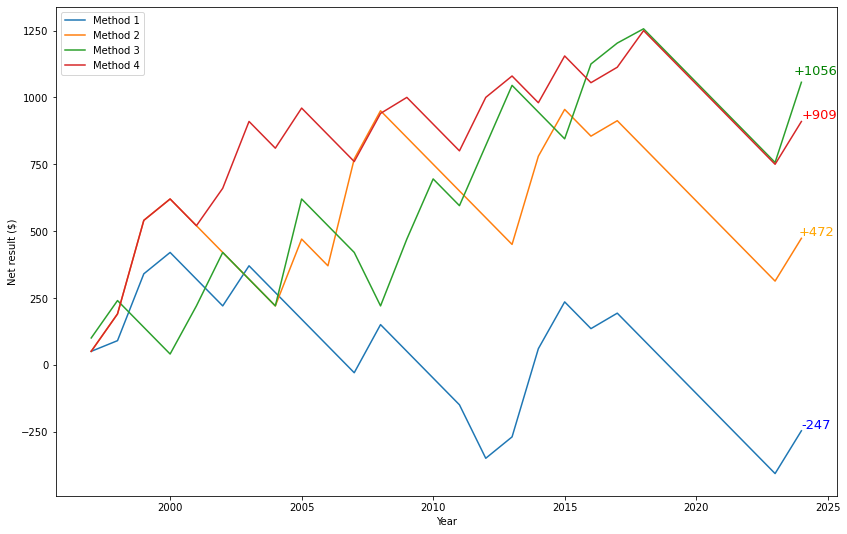

In [65]:
from matplotlib import pyplot as pl


X = range(1997,2025)

fig, ax = pl.subplots(figsize=(14,9))

pl.plot(X,Bank_Account_1, label="Method 1")
pl.plot(X,Bank_Account_2, label="Method 2")
pl.plot(X,Bank_Account_3, label="Method 3")
pl.plot(X,Bank_Account_4, label="Method 4")


pl.annotate(f'{int(Bank_Account_1[-1])}',xy=(X[-1],Bank_Account_1[-1]),
            xytext=(X[-1] , Bank_Account_1[-1]+10),color = 'blue', fontsize=13)

pl.annotate(f'+{int(Bank_Account_2[-1])}',xy=(X[-1],Bank_Account_2[-1]),
            xytext=(X[-1]-.1 , Bank_Account_2[-1]+10),color = 'orange', fontsize=13)

pl.annotate(f'+{int(Bank_Account_3[-1])}',xy=(X[-1],Bank_Account_3[-1]),
            xytext=(X[-1]-.3 , Bank_Account_3[-1]+30),color = 'green', fontsize=13)

pl.annotate(f'+{int(Bank_Account_4[-1])}',xy=(X[-1],Bank_Account_4[-1]),
            xytext=(X[-1] , Bank_Account_4[-1]+10),color = 'red', fontsize=13)

pl.legend(loc="upper left")

pl.xlabel("Year")
pl.ylabel("Net result ($)")

pl.show()